0 0
0 3079
4119 3079
4119 0


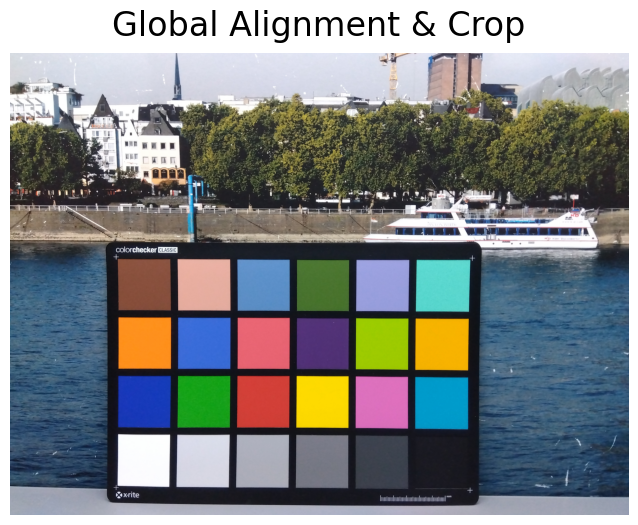

True

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

def global_alignment_by_target_img(target_img, noisy_img, border = 5):
    height , width , _ = target_img.shape
    x1 , y1 = 0 , np.where(np.sum(target_img , axis = 2)[ : , 0] != 0)[0][0]
    x2 , y2 = 0 , np.where(np.sum(target_img , axis = 2)[ : , 0] != 0)[0][-1]
    x3 , y3 = width - 1 , np.where(np.sum(target_img , axis = 2)[ : , -1] != 0)[0][-1]
    x4 , y4 = width - 1 , np.where(np.sum(target_img , axis = 2)[ : , -1] != 0)[0][0]
    new_height = min(abs(y1 - y2) , abs(y3 - y4))
    new_width = min(abs(x1 - x4) , abs(x2 - x3))
    print(x1, y1)
    print(x2, y2)
    print(x3, y3)
    print(x4, y4)
    target_img = target_img[y4:y4+new_height, x1:new_width, :]
    noisy_img = noisy_img[y4:y4+new_height, x1:new_width, :]
    return target_img, noisy_img

target_name = "align_region2_target"
noisy_name = "region2_noisy"
target_img = cv2.imread(target_name+".jpg")
noisy_img = cv2.imread(noisy_name+".jpg")
target_img, noisy_img = global_alignment_by_target_img(target_img, noisy_img)
plt.figure(figsize = (18 , 6))
plt.title('Global Alignment & Crop' , fontsize = 24 , y = 1.02)
plt.imshow(cv2.cvtColor(target_img , cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.imwrite(target_name+"_clip_0.jpg", target_img)
# cv2.imwrite(noisy_name+"_clip_0.jpg", noisy_img)